# **Lending Club Loan Data**
**by Aditya Raybol Saragih** 

In [0]:
import numpy as np
import pandas as pd

import time

from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# **1 - Akses Data**

In [0]:
#Karena saya menggunakan Google Colab, jadi saya harus menyimpan dataset di google drive
#Sehingga harus di drive mount terlebih dahulu agar tersambung ke google drive saya
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
dataset = "/content/drive/My Drive/loan.csv"
df = pd.read_csv(dataset)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# **2 - VISUALISASI DATA**

In [0]:
#Memperlihatkan 10 dataframe pertama
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,...,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,...,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0.0,Apr-2011,0.0,NaN,NaN,8.0,0.0,4599,19.1,13.0,w,4787.21,4787.21,353.89,353.89,...,0.0,0.0,136927.0,11749.0,13800.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,MORTGAGE,92000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,985xx,WA,16.74,0.0,Feb-2006,0.0,NaN,NaN,10.0,0.0,5468,78.1,13.0,w,3831.93,3831.93,286.71,286.71,...,0.0,0.0,385183.0,36151.0,5000.0,44984.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,MORTGAGE,57250.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,212xx,MD,26.35,0.0,Dec-2000,0.0,NaN,NaN,12.0,0.0,829,3.6,26.0,w,29339.02,29339.02,1423.21,1423.21,...,0.0,0.0,157548.0,29674.0,9300.0,32332.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,5550,5550,5550.0,36 months,15.02,192.45,C,C3,Director COE,10+ years,MORTGAGE,152500.0,Not Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,461xx,IN,37.94,0.0,Sep-2002,3.0,NaN,NaN,18.0,0.0,53854,48.1,44.0,w,5302.50,5302.50,377.95,377.95,...,0.0,0.0,831687.0,185378.0,65900.0,203159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,2000,2000,2000.0,36

In [0]:
df.shape

(2260668, 145)

Text(0.5, 1.0, 'Total committed by Investors')

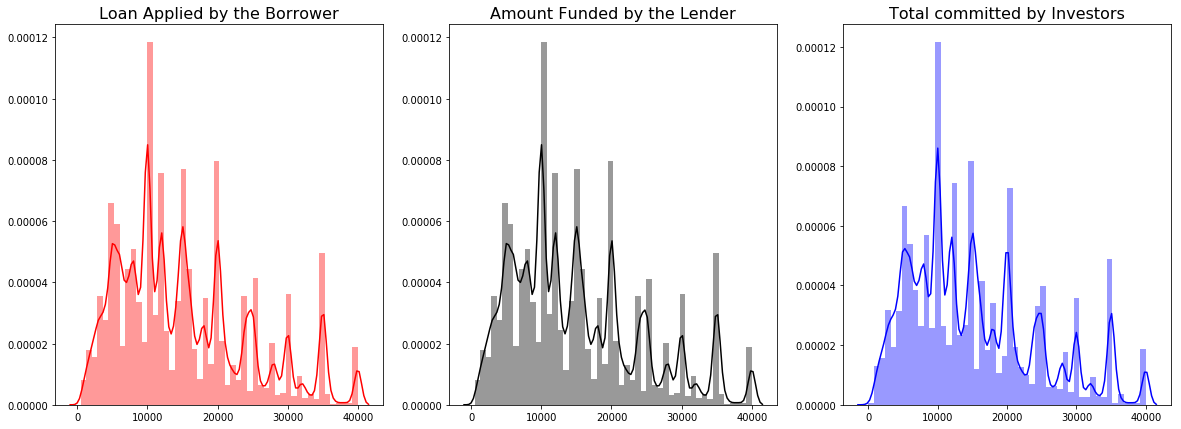

In [0]:
fig, ax = plt.subplots(1, 3, figsize=(20,7))

loan_amount = df["loan_amnt"].values
funded_amount = df["funded_amnt"].values
investor_funds = df["funded_amnt_inv"].values

sns.distplot(loan_amount, ax=ax[0], color="red")
ax[0].set_title("Loan Applied by the Borrower", fontsize=16)
sns.distplot(funded_amount, ax=ax[1], color="black")
ax[1].set_title("Amount Funded by the Lender", fontsize=16)
sns.distplot(investor_funds, ax=ax[2], color="blue")
ax[2].set_title("Total committed by Investors", fontsize=16)

In [0]:
df['issue_d'].head()
dt_series = pd.to_datetime(df['issue_d'])
df['year'] = dt_series.dt.year

Text(0, 0.5, 'Average loan amount issued')

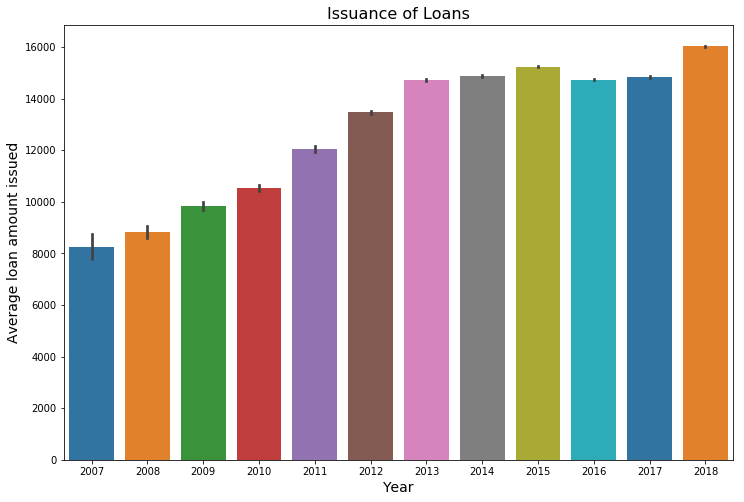

In [0]:
plt.figure(figsize=(12,8))
sns.barplot('year', 'loan_amnt', data=df, palette='tab10')
plt.title('Issuance of Loans', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average loan amount issued', fontsize=14)

In [0]:
employment_length = ['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
                    '4 years', '5 years', '6 years', '2 years', '7 years', 'n/a']

# Create a new column and convert emp_length to integers.

lst = [df]
df['emp_length_int'] = np.nan

for col in lst:
    col.loc[col['emp_length'] == '10+ years', "emp_length_int"] = 10
    col.loc[col['emp_length'] == '9 years', "emp_length_int"] = 9
    col.loc[col['emp_length'] == '8 years', "emp_length_int"] = 8
    col.loc[col['emp_length'] == '7 years', "emp_length_int"] = 7
    col.loc[col['emp_length'] == '6 years', "emp_length_int"] = 6
    col.loc[col['emp_length'] == '5 years', "emp_length_int"] = 5
    col.loc[col['emp_length'] == '4 years', "emp_length_int"] = 4
    col.loc[col['emp_length'] == '3 years', "emp_length_int"] = 3
    col.loc[col['emp_length'] == '2 years', "emp_length_int"] = 2
    col.loc[col['emp_length'] == '1 year', "emp_length_int"] = 1
    col.loc[col['emp_length'] == '< 1 year', "emp_length_int"] = 0.5
    col.loc[col['emp_length'] == 'n/a', "emp_length_int"] = 0

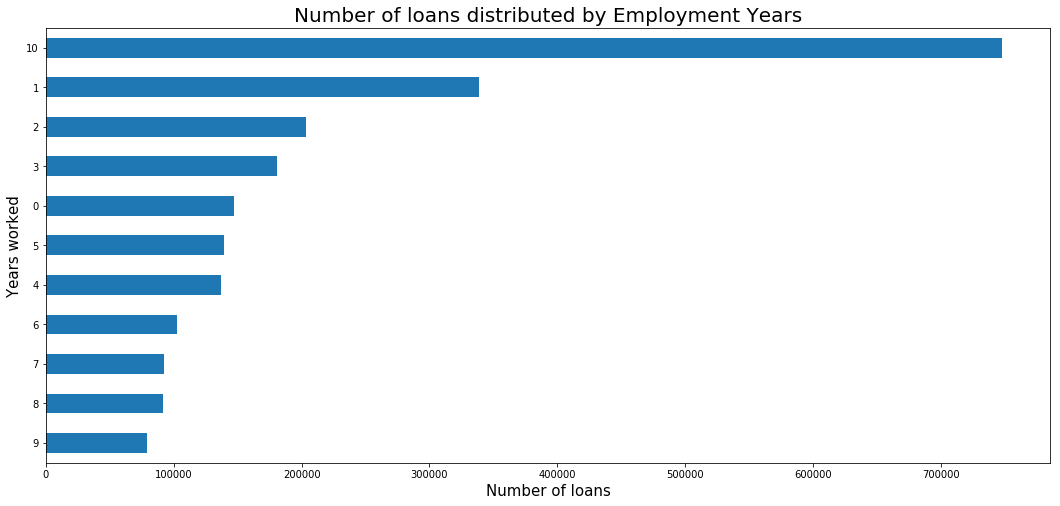

In [0]:
df['emp_length'].fillna(value=0,inplace=True)

df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)

df['emp_length'].value_counts().sort_values().plot(kind='barh',figsize=(18,8))
plt.title('Number of loans distributed by Employment Years',fontsize=20)
plt.xlabel('Number of loans',fontsize=15)
plt.ylabel('Years worked',fontsize=15);

In [0]:
target_list = [1 if i=='Default' else 0 for i in df['loan_status']]

df['TARGET'] = target_list
df['TARGET'].value_counts()

0    2260637
1         31
Name: TARGET, dtype: int64

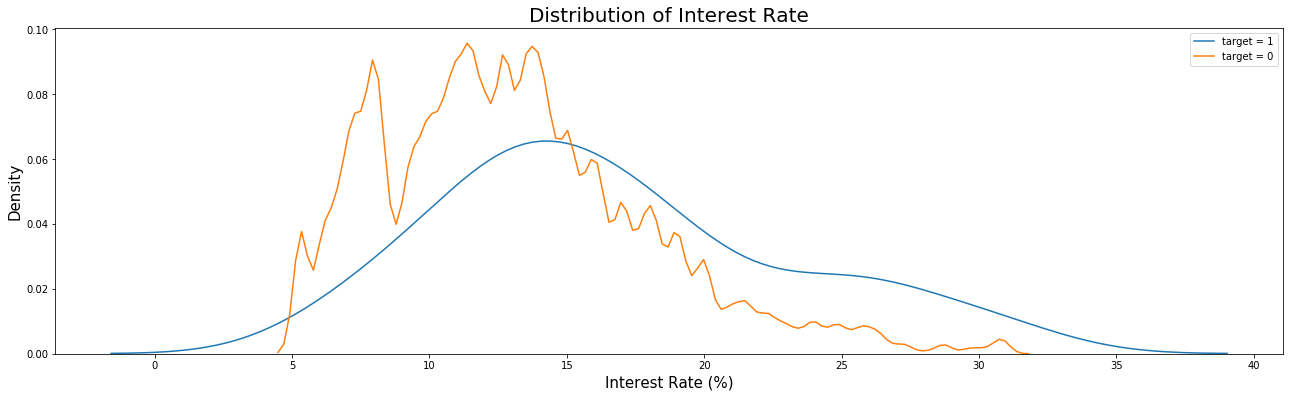

In [0]:
fig = plt.figure(figsize=(22,6))
sns.kdeplot(df.loc[df['TARGET'] == 1, 'int_rate'], label = 'target = 1')
sns.kdeplot(df.loc[df['TARGET'] == 0, 'int_rate'], label = 'target = 0');
plt.xlabel('Interest Rate (%)',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Distribution of Interest Rate',fontsize=20);

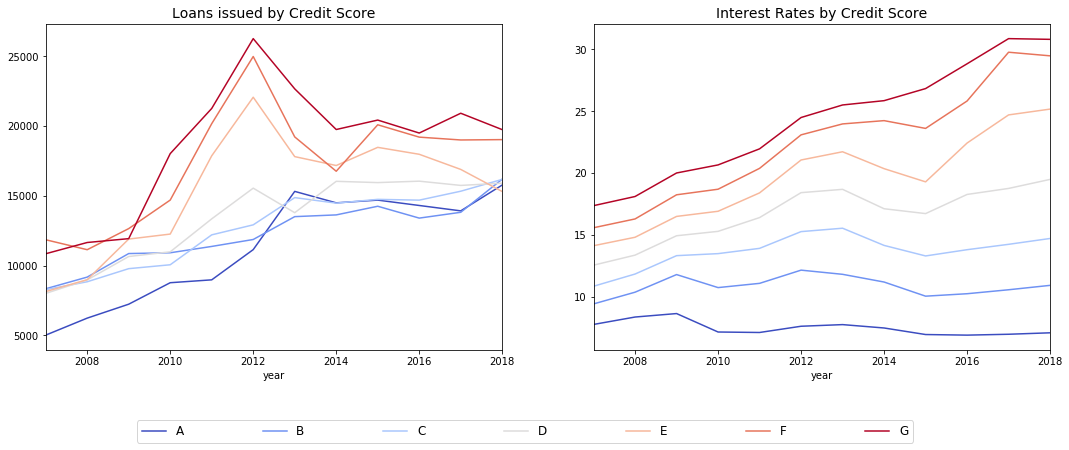

In [0]:
# Let's visualize how many loans were issued by creditscore
f, ((ax1, ax2)) = plt.subplots(1, 2)
cmap = plt.cm.coolwarm

by_credit_score = df.groupby(['year', 'grade']).loan_amnt.mean()
by_credit_score.unstack().plot(legend=False, ax=ax1, figsize=(18, 6), colormap=cmap)
ax1.set_title('Loans issued by Credit Score', fontsize=14)
    
    
by_inc = df.groupby(['year', 'grade']).int_rate.mean()
by_inc.unstack().plot(ax=ax2, figsize=(18, 6), colormap=cmap)
ax2.set_title('Interest Rates by Credit Score', fontsize=14)

ax2.legend(bbox_to_anchor=(-1.0, -0.3, 1.7, 0.1), loc=5, prop={'size':12},
           ncol=7, mode="expand", borderaxespad=0.)

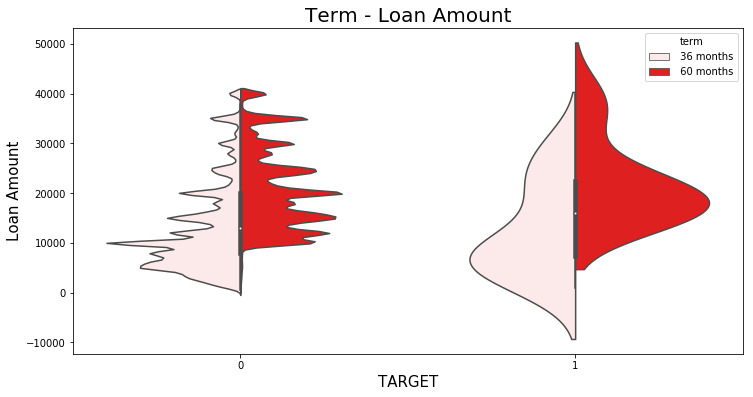

In [0]:
fig = plt.figure(figsize=(12,6))
sns.violinplot(x="TARGET",y="loan_amnt",data=df, hue="term", split=True,color='red')
plt.title("Term - Loan Amount", fontsize=20)
plt.xlabel("TARGET", fontsize=15)
plt.ylabel("Loan Amount", fontsize=15);

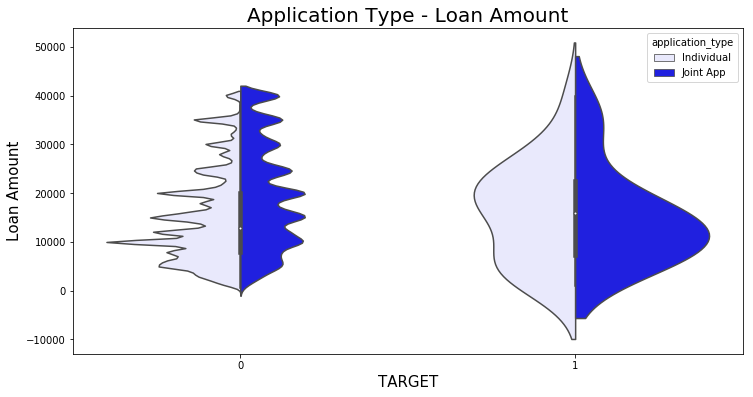

In [0]:
fig = plt.figure(figsize=(12,6))
sns.violinplot(x="TARGET",y="loan_amnt",data=df, hue="application_type", split=True,color='blue')
plt.title("Application Type - Loan Amount", fontsize=20)
plt.xlabel("TARGET", fontsize=15)
plt.ylabel("Loan Amount", fontsize=15);

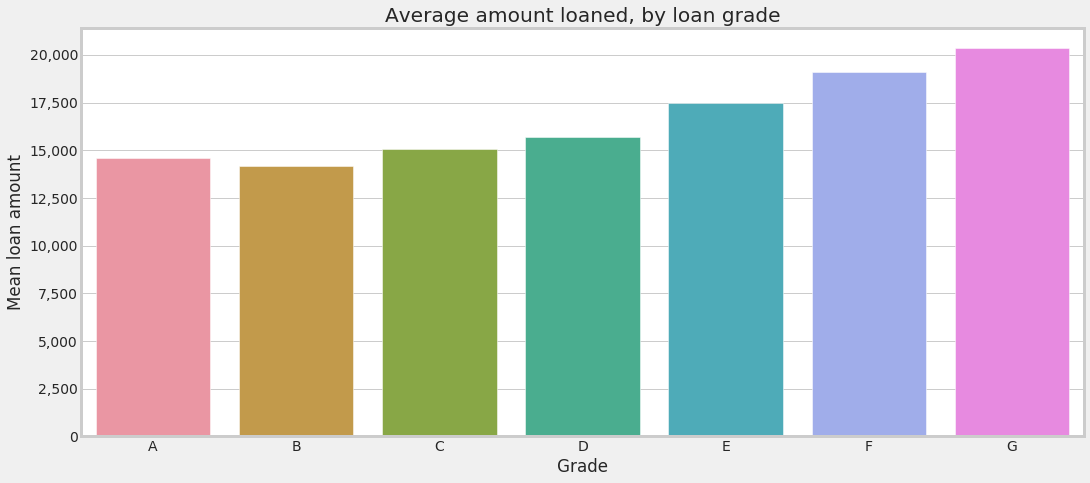

In [0]:
group = df.groupby('grade').agg([np.mean])
loan_amt_mean = group['loan_amnt'].reset_index()

plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(16,7))

sns.set_style("whitegrid")
ax = sns.barplot(y = "mean", x = 'grade', data=loan_amt_mean)
ax.set(xlabel = 'Grade', ylabel = 'Mean loan amount', title = 'Average amount loaned, by loan grade')
ax.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

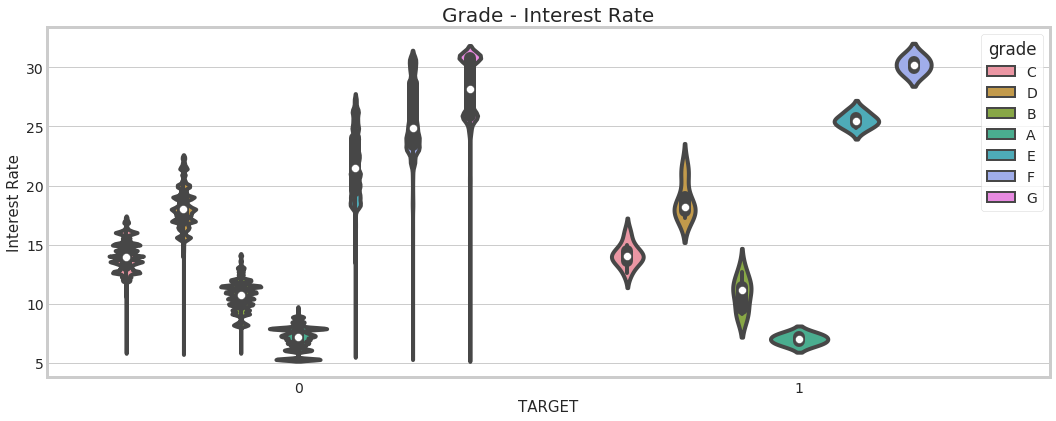

In [0]:
fig = plt.figure(figsize=(16,6))
sns.violinplot(x="TARGET",y="int_rate",data=df, hue="grade")
plt.title("Grade - Interest Rate", fontsize=20)
plt.xlabel("TARGET", fontsize=15)
plt.ylabel("Interest Rate", fontsize=15);

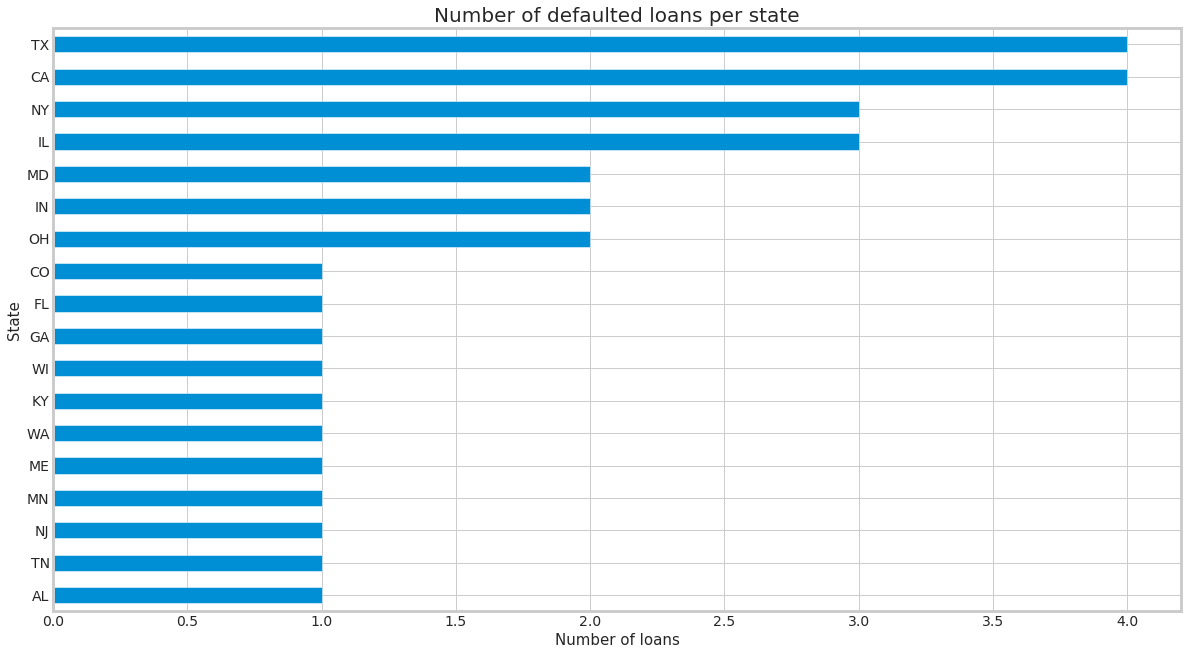

In [0]:
fig = plt.figure(figsize=(18,10))
df[df['TARGET']==1].groupby('addr_state')['TARGET'].count().sort_values().plot(kind='barh')
plt.ylabel('State',fontsize=15)
plt.xlabel('Number of loans',fontsize=15)
plt.title('Number of defaulted loans per state',fontsize=20);

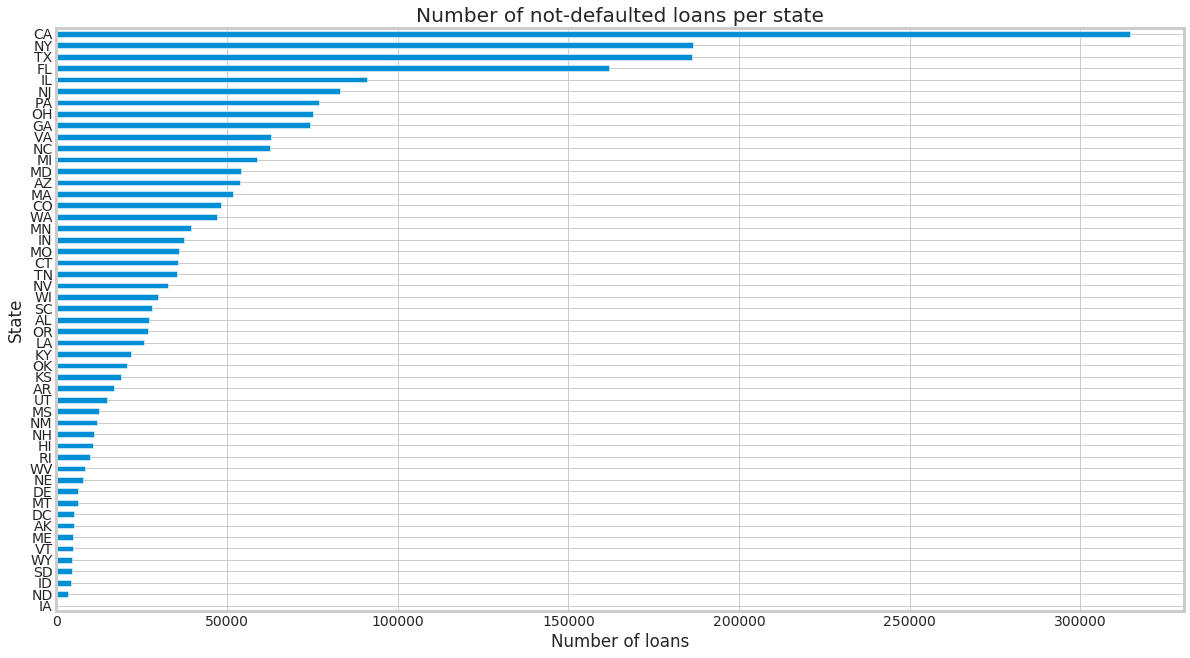

In [0]:
fig = plt.figure(figsize=(18,10))
df[df['TARGET']==0].groupby('addr_state')['TARGET'].count().sort_values().plot(kind='barh')
plt.ylabel('State')
plt.xlabel('Number of loans')
plt.title('Number of not-defaulted loans per state');

# **3 - PEMBERSIHAN DATA**

In [0]:
#Memperlihatkan jumlah data null di kolom yang memiliki missing data
naList = df.columns[df.isnull().any()].tolist()
for i in naList:
    print(i,':',df[i].isnull().sum())

id : 2260668
member_id : 2260668
emp_title : 166969
annual_inc : 4
url : 2260668
desc : 2134601
title : 23325
zip_code : 1
dti : 1711
delinq_2yrs : 29
earliest_cr_line : 29
inq_last_6mths : 30
mths_since_last_delinq : 1158502
mths_since_last_record : 1901512
open_acc : 29
pub_rec : 29
revol_util : 1802
total_acc : 29
last_pymnt_d : 2426
next_pymnt_d : 1303607
last_credit_pull_d : 73
collections_12_mths_ex_med : 145
mths_since_last_major_derog : 1679893
annual_inc_joint : 2139958
dti_joint : 2139962
verification_status_joint : 2144938
acc_now_delinq : 29
tot_coll_amt : 70276
tot_cur_bal : 70276
open_acc_6m : 866130
open_act_il : 866129
open_il_12m : 866129
open_il_24m : 866129
mths_since_rcnt_il : 909924
total_bal_il : 866129
il_util : 1068850
open_rv_12m : 866129
open_rv_24m : 866129
max_bal_bc : 866129
all_util : 866348
total_rev_hi_lim : 70276
inq_fi : 866129
total_cu_tl : 866130
inq_last_12m : 866130
acc_open_past_24mths : 50030
avg_cur_bal : 70346
bc_open_to_buy : 74935
bc_util : 7

In [0]:
#Fungsi untuk mengubah missing data pada kolom menjadi persentase missing data
def null_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [0]:
# Missing values statistics
miss_values = null_values(df)
miss_values

Dataframe has 148 columns.
There are 113 columns that have missing values.


,Missing Values,% of Total Values
id,2260668,100.0
url,2260668,100.0
member_id,2260668,100.0
orig_projected_additional_accrued_interest,2252242,99.6
hardship_loan_status,2250055,99.5
hardship_type,2250055,99.5
hardship_reason,2250055,99.5
hardship_status,2250055,99.5
deferral_term,2250055,99.5
hardship_amount,2250055,99.5


In [0]:
#Menghapus semua kolom yang memiliki missing data lebih dari 0,0001 % dari jumlah baris datanya.
temp = [i for i in df.count()<2260668 *0.9999]
df.drop(df.columns[temp],axis=1,inplace=True)

In [0]:
df.shape

(2260668, 49)

In [0]:
df.isnull().sum()

loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_length                      0
home_ownership                  0
annual_inc                      4
verification_status             0
issue_d                         0
loan_status                     0
pymnt_plan                      0
purpose                         0
zip_code                        1
addr_state                      0
delinq_2yrs                    29
earliest_cr_line               29
inq_last_6mths                 30
open_acc                       29
pub_rec                        29
revol_bal                       0
total_acc                      29
initial_list_status             0
out_prncp                       0
out_prncp_inv                   0
total_pymnt                     0
total_pymnt_in

In [0]:
#Karena missing datanya sudah sedikit, disini saya melakukan dropna secara menyeluruh
df_bersih = df.dropna()
df_bersih

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag,year,TARGET
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,10,RENT,55000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,109xx,NY,0.0,Apr-2001,1.0,9.0,1.0,4341,34.0,w,2386.02,2386.02,167.020000,167.02,113.98,53.04,0.00,0.00,0.0000,84.92,Feb-2019,0.0,1,Individual,0.0,0.0,0.0,0.0,N,Cash,N,2018,0
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,10,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,713xx,LA,0.0,Jun-1987,0.0,13.0,1.0,12315,44.0,w,29387.75,29387.75,1507.110000,1507.11,612.25,894.86,0.00,0.00,0.0000,777.23,Feb-2019,0.0,1,Individual,0.0,0.0,0.0,0.0,N,Cash,N,2018,0
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,6,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,debt_consolidation,490xx,MI,0.0,Apr-2011,0.0,8.0,0.0,4599,13.0,w,4787.21,4787.21,353.890000,353.89,212.79,141.10,0.00,0.00,0.0000,180.69,Feb-2019,0.0,1,Individual,0.0,0.0,0.0,0.0,N,Cash,N,2018,0
3,4000,4000,4000.0,36 months,18.94,146.51,D,D2,10,MORTGAGE,92000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,985xx,WA,0.0,Feb-2006,0.0,10.0,0.0,5468,13.0,w,3831.93,3831.93,286.710000,286.71,168.07,118.64,0.00,0.00,0.0000,146.51,Feb-2019,0.0,1,Individual,0.0,0.0,0.0,0.0,N,Cash,N,2018,0
4,30000,30000,30000.0,60 months,16.14,731.78,C,C4,10,MORTGAGE,57250.0,Not Verified,Dec-2018,Current,n,debt_consolidation,212xx,MD,0.0,Dec-2000,0.0,12.0,0.0,829,26.0,w,29339.02,29339.02,1423.210000,1423.21,660.98,762.23,0.00,0.00,0.0000,731.78,Feb-2019,0.0,1,Individual,0.0,0.0,0.0,0.0,N,Cash,N,2018,0
5,5550,5550,5550.0,36 months,15.02,192.45,C,C3,10,MORTGAGE,152500.0,Not Verified,Dec-2018,Current,n,credit_card,461xx,IN,0.0,Sep-2002,3.0,18.0,0.0,53854,44.0,w,5302.50,5302.50,377.950000,377.95,247.50,130.45,0.00,0.00,0.0000,192.45,Feb-2019,0.0,1,Individual,0.0,0.0,0.0,0.0,N,Cash,N,2018,0
6,2000,2000,2000.0,36 months,17.97,72.28,D,D1,4,RENT,51000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,606xx,IL,0.0,Nov-2004,1.0,1.0,0.0,0,9.0,w,1914.71,1914.71,141.560000,141.56,85.29,56.27,0.00,0.00,0.0000,72.28,Feb-2019,0.0,1,Individual,0.0,0.0,0.0,0.0,N,Cash,N,2018,0
7,6000,6000,6000.0,36 months,13.56,203.79,C,C1,10,RENT,65000.0,Source Verified,Dec-2018,Current,n,credit_card,460xx,IN,0.0,Nov-1997,0.0,19.0,0.0,38476,37.0,w,5864.01,5864.01,201.530000,201.53,135.99,65.54,0.00,0.00,0.0000,208.31,Feb-2019,0.0,1,Individual,0.0,0.0,0.0,0.0,N,DirectPay,N,2018,0
8,5000,5000,5000.0,36 months,17.97,180.69,D,D1,10,MORTGAGE,53580.0,Source Verified,Dec-2018,Current,n,debt_consolidation,327xx,FL,0.0,Aug-1998,1.0,8.0,0.0,8018,38.0,w,4786.79,4786.79,353.890000,353.89,213.21,140.68,0.00,0.00,0.0000,180.69,Feb-2019,0.0,1,Individual,0.0,0.0,0.0,0.0,N,Cash,N,2018,0
9,6000,6000,6000.0,36 months,14.47,206.44,C,C2,1,OWN,300000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,068xx,CT,1.0,Apr-2002,1.0,38.0,0.0,65950,58.0,w,5730.20,5730.20,405.640000,405.64,269.80,135.84,0.00,0.00,0.0000,206.44,Feb-2019,0.0,1,Individual,0.0,0.0,0.0,0.0,N,Cash,N,2018,0


In [0]:
#Dapat dilihat missing data sudah tidak ada lagi
df_bersih.isnull().values.any()

False

In [0]:
#Bisa dilihat bahwa jumlah baris yang dihilangkan sangat sedikit, jadi tidak akan terlalu mempengaruhi modeling yang akan dilakukan nanti
df_bersih.shape

(2260450, 49)

In [0]:
df_bersih.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens,year,TARGET
count,2.260450e+06,2.260450e+06,2.260450e+06,2.260450e+06,2.260450e+06,2.260450e+06,2.260450e+06,2.260450e+06,2.260450e+06,2.260450e+06,2.260450e+06,2.260450e+06,2.260450e+06,2.260450e+06,2.260450e+06,2.260450e+06,2.260450e+06,2.260450e+06,2.260450e+06,2.260450e+06,2.260450e+06,2.260450e+06,2.260450e+06,2260450.0,2.260450e+06,2.260450e+06,2.260450e+06,2.260450e+06,2.260450e+06,2.260450e+06
mean,1.504756e+04,1.504232e+04,1.502438e+04,1.309304e+01,4.458251e+02,7.799294e+04,3.068721e-01,5.767480e-01,1.161256e+01,1.975323e-01,1.665873e+04,2.416292e+01,4.446674e+03,4.445676e+03,1.182438e+04,1.180659e+04,9.300390e+03,2.386451e+03,1.462304e+00,1.360746e+02,2.259309e+01,3.364190e+03,1.814550e-02,1.0,4.147404e-03,8.464244e-03,1.236817e+01,4.677255e-02,2.015858e+03,1.371408e-05
std,9.190169e+03,9.188336e+03,9.191944e+03,4.832181e+00,2.671714e+02,1.126999e+05,8.671986e-01,8.855386e-01,5.640837e+00,5.705289e-01,2.294778e+04,1.198738e+01,7.547840e+03,7.546885e+03,9.889737e+03,9.884780e+03,8.305014e+03,2.663146e+03,1.150195e+01,7.258397e+02,1.271091e+02,5.971917e+03,1.508127e-01,0.0,6.961316e-02,1.048094e-01,7.264840e+02,3.775421e-01,1.791276e+00,3.703229e-03
min,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.500000e-09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.007000e+03,0.000000e+00
25%,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516800e+02,4.600000e+04,0.000000e+00,0.000000e+00,8.000000e+00,0.000000e+00,5.951000e+03,1.500000e+01,0.000000e+00,0.000000e+00,4.272585e+03,4.258815e+03,2.846193e+03,6.936500e+02,0.000000e+00,0.000000e+00,0.000000e+00,3.087200e+02,0.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.015000e+03,0.000000e+00
50%,1.292500e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.780600e+02,6.500000e+04,0.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,1.132400e+04,2.200000e+01,0.000000e+00,0.000000e+00,9.061272e+03,9.043855e+03,6.824305e+03,1.485370e+03,0.000000e+00,0.000000e+00,0.000000e+00,5.885000e+02,0.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.016000e+03,0.000000e+00
75%,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,0.000000e+00,1.000000e+00,1.400000e+01,0.000000e+00,2.024700e+04,3.100000e+01,6.714570e+03,6.711045e+03,1.670851e+04,1.668318e+04,1.340000e+04,3.052347e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.535387e+03,0.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.017000e+03,0.000000e+00
max,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,5.800000e+01,3.300000e+01,1.010000e+02,8.600000e+01,2.904836e+06,1.760000e+02,4.000000e+04,4.000000e+04,6.329688e+04,6.329688e+04,4.000000e+04,2.819250e+04,1.427250e+03,3.985955e+04,7.174719e+03,4.219205e+04,2.000000e+01,1.0,1.400000e+01,1.000000e+01,2.499250e+05,8.500000e+01,2.018000e+03,1.000000e+00


In [0]:
#menentukan kolom loan_status sebagai target atau data labelnya
target_list = [1 if i=='Default' else 0 for i in df_bersih['loan_status']]

df_bersih['TARGET'] = target_list
df_bersih['TARGET'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0    2260419
1         31
Name: TARGET, dtype: int64

In [0]:
corr = df_bersih.corr()['TARGET'].sort_values(ascending=False)
corr

TARGET                        1.000000
total_rec_late_fee            0.011563
out_prncp_inv                 0.003368
out_prncp                     0.003367
int_rate                      0.002787
year                          0.002160
delinq_2yrs                   0.001307
total_rec_int                 0.001016
pub_rec                       0.000812
installment                   0.000478
inq_last_6mths                0.000421
funded_amnt_inv               0.000312
funded_amnt                   0.000305
loan_amnt                     0.000303
tax_liens                     0.000174
delinq_amnt                  -0.000063
acc_now_delinq               -0.000221
total_acc                    -0.000270
chargeoff_within_12_mths     -0.000299
annual_inc                   -0.000392
collections_12_mths_ex_med   -0.000446
revol_bal                    -0.000478
collection_recovery_fee      -0.000658
recoveries                   -0.000694
open_acc                     -0.000805
total_pymnt_inv          

In [0]:
#disini saya mencari tau kolom apa saja yang berkolerasi dengan data label secara statistik 
df_bersih.describe().drop('TARGET',axis=1).columns.tolist()

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens',
 'year']

In [0]:
#Menentukan kolom yang akan menjadi data feature
data_feature = df_bersih.loc[:,['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens',
 'year']]
data_feature.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens,year
0,2500,2500,2500.0,13.56,84.92,55000.0,0.0,1.0,9.0,1.0,4341,34.0,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,84.92,0.0,1,0.0,0.0,0.0,0.0,2018
1,30000,30000,30000.0,18.94,777.23,90000.0,0.0,0.0,13.0,1.0,12315,44.0,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,777.23,0.0,1,0.0,0.0,0.0,0.0,2018
2,5000,5000,5000.0,17.97,180.69,59280.0,0.0,0.0,8.0,0.0,4599,13.0,4787.21,4787.21,353.89,353.89,212.79,141.10,0.0,0.0,0.0,180.69,0.0,1,0.0,0.0,0.0,0.0,2018
3,4000,4000,4000.0,18.94,146.51,92000.0,0.0,0.0,10.0,0.0,5468,13.0,3831.93,3831.93,286.71,286.71,168.07,118.64,0.0,0.0,0.0,146.51,0.0,1,0.0,0.0,0.0,0.0,2018
4,30000,30000,30000.0,16.14,731.78,57250.0,0.0,0.0,12.0,0.0,829,26.0,29339.02,29339.02,1423.21,1423.21,660.98,762.23,0.0,0.0,0.0,731.78,0.0,1,0.0,0.0,0.0,0.0,2018
5,5550,5550,5550.0,15.02,192.45,152500.0,0.0,3.0,18.0,0.0,53854,44.0,5302.50,5302.50,377.95,377.95,247.50,130.45,0.0,0.0,0.0,192.45,0.0,1,0.0,0.0,0.0,0.0,2018
6,2000,2000,2000.0,17.97,72.28,51000.0,0.0,1.0,1.0,0.0,0,9.0,1914.71,1914.71,141.56,141.56,85.29,56.27,0.0,0.0,0.0,72.28,0.0,1,0.0,0.0,0.0,0.0,2018
7,6000,6000,6000.0,13.56,203.79,65000.0,0.0,0.0,19.0,0.0,38476,37.0,5864.01,5864.01,201.53,201.53,135.99,65.54,0.0,0.0,0.0,208.31,0.0,1,0.0,0.0,0.0,0.0,2018
8,5000,5000,5000.0,17.97,180.69,53580.0,0.0,1.0,8.0,0.0,8018,38.0,4786.79,4786.79,353.89,353.89,213.21,140.68,0.0,0.0,0.0,180.69,0.0,1,0.0,0.0,0.0,0.0,2018
9,6000,6000,6000.0,14.47,206.44,300000.0,1.0,1.0,38.0,0.0,65950,58.0,5730.20,5730.20,405.64,405.64,269.80,135.84,0.0,0.0,0.0,206.44,0.0,1,0.0,0.0,0.0,0.0,2018


# **4 - MODELING**



In [0]:
#Splitting X dan Y untuk Model Regressor
(trainX, testX, trainY, testY) = train_test_split(data_feature,target_list,test_size=0.30,random_state=101)

In [0]:
class Color:
   BOLD = '\033[1m'
   END = '\033[0m'

In [0]:
def scoring(model, prediction, since):
  if model == "lin":
    print(Color.BOLD + "Linear Regression" + Color.END)
  elif model == "dt":
    print(Color.BOLD + "Decision Tree" + Color.END)
  elif model == "rf":
    print(Color.BOLD + "Random Forest" + Color.END)
  elif model == "log_reg":
    print(Color.BOLD + "LogisticRegression" + Color.END)
  trainingDuration = time.time() - since
  print("Training Duration : %d s" % (trainingDuration))
  R2 = r2_score(testY, prediction)
  MSE = mean_squared_error(testY, prediction)
  MAE = mean_absolute_error(testY, prediction)
  RMSE = np.sqrt(mean_squared_error(testY, prediction))
  print("R2 Score : " + Color.BOLD + str(R2) + Color.END)
  print("Mean Squared Error : " + Color.BOLD + str(MSE) + Color.END)
  print("Mean Absolute Error : " + Color.BOLD + str(MAE) + Color.END)
  print("Root Mean Squared Error : " + Color.BOLD + str(RMSE) + Color.END)
  print("\n")
  score = [MSE, MAE, RMSE]
  return score

In [0]:
def lin():
  since = time.time()
  linreg = LinearRegression().fit(trainX, trainY)
  linpred = linreg.predict(testX)
  linscore = scoring("lin", linpred, since)
  return linscore

def dt():
  since = time.time()
  dtreg = tree.DecisionTreeRegressor().fit(trainX, trainY)
  dtpred = dtreg.predict(testX)
  dtscore = scoring("dt", dtpred, since)
  return dtscore

def rf(n_est=100, depth=5):
  since = time.time()
  rfreg = RandomForestRegressor(n_estimators=n_est, max_depth=depth).fit(trainX, trainY)
  rfpred = rfreg.predict(testX)
  rfscore = scoring("rf", rfpred, since)
  return rfscore

def log_reg ():
  log_reg = LogisticRegression()
  log_reg.fit(trainX, trainY)
  since = time.time()
  logpred = log_reg.predict(testX)
  logscore = scoring("log_reg", logpred, since)
  return logscore


In [0]:
linscore = lin()

Linear Regression
Training Duration : 1 s
R2 Score : -0.00015058127136802213
Mean Squared Error : 1.0323876220841072e-05
Mean Absolute Error : 3.5892345837601024e-05
Root Mean Squared Error : 0.003213078931623229




In [0]:
dtscore = dt()

Decision Tree
Training Duration : 16 s
R2 Score : -0.714303410059961
Mean Squared Error : 1.76955915857462e-05
Mean Absolute Error : 1.76955915857462e-05
Root Mean Squared Error : 0.004206612840011094




In [0]:
rfscore = rf()

Random Forest
Training Duration : 905 s
R2 Score : -0.06919687439652367
Mean Squared Error : 1.1036594282581224e-05
Mean Absolute Error : 2.5886873748858106e-05
Root Mean Squared Error : 0.003322137005389938




In [0]:
logscore = log_reg ()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression
Training Duration : 0 s
R2 Score : -1.032253497723623e-05
Mean Squared Error : 1.0322428425018617e-05
Mean Absolute Error : 1.0322428425018617e-05
Root Mean Squared Error : 0.0032128536264539997




# **5 - EVALUASI**

In [0]:
label = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Logistic Regression']
r2 = [linscore[0], dtscore[0], rfscore[0], logscore[0]]
mse = [linscore[1], dtscore[1], rfscore[1], logscore[1]]
mae = [linscore[2], dtscore[2], rfscore[2], logscore[2]]
rmse = [linscore[2], dtscore[2], rfscore[2], logscore[2]]
index = np.arange(len(label))

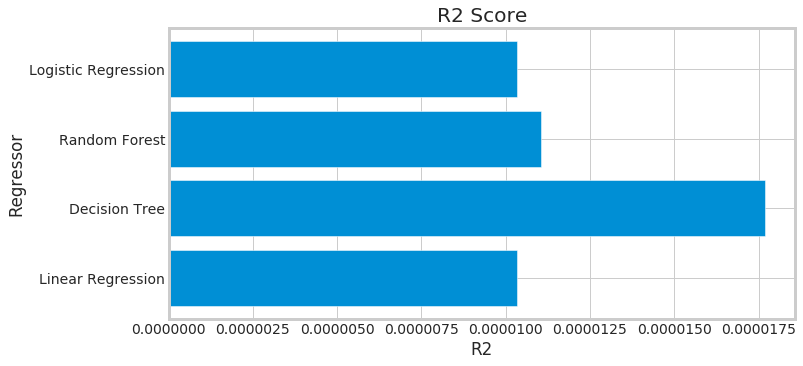

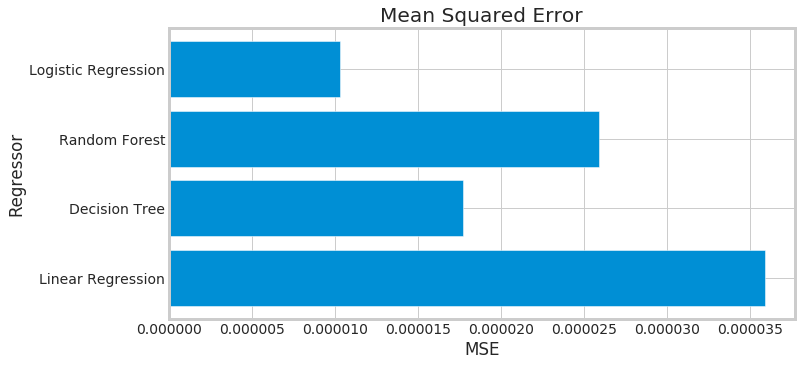

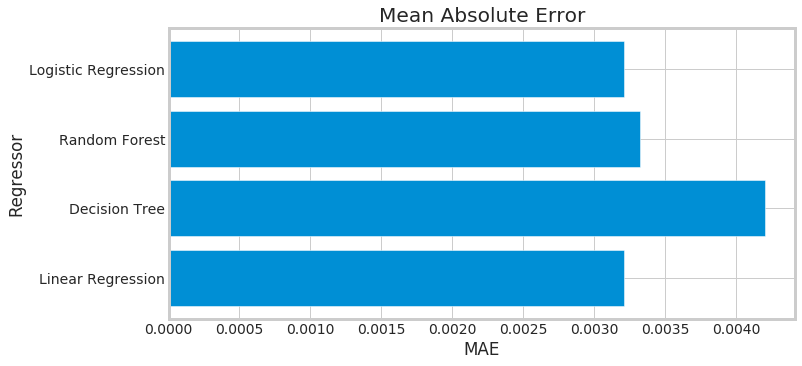

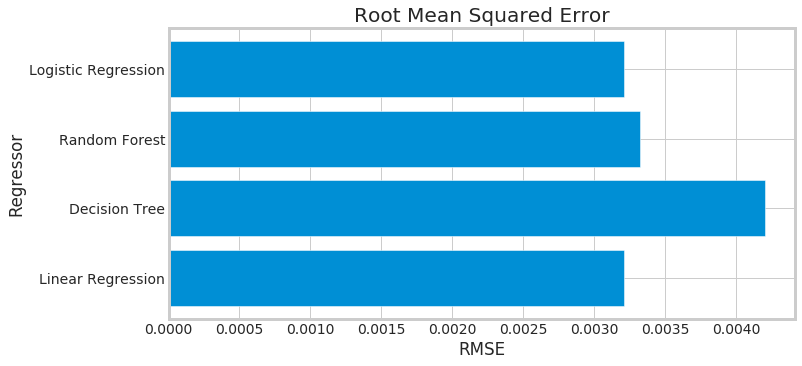

In [0]:
plt.figure(figsize=(10,5))
plt.barh(index, r2)
plt.ylabel('Regressor')
plt.xlabel('R2')
plt.yticks(index, label)
plt.title('R2 Score')

plt.figure(figsize=(10,5))
plt.barh(index, mse)
plt.ylabel('Regressor')
plt.xlabel('MSE')
plt.yticks(index, label)
plt.title('Mean Squared Error')

plt.figure(figsize=(10,5))
plt.barh(index, mae)
plt.ylabel('Regressor')
plt.xlabel('MAE')
plt.yticks(index, label)
plt.title('Mean Absolute Error')

plt.figure(figsize=(10,5))
plt.barh(index, rmse)
plt.ylabel('Regressor')
plt.xlabel('RMSE')
plt.yticks(index, label)
plt.title('Root Mean Squared Error')

plt.show()

# **6 - KESIMPULAN**

Dari hasil percobaan modeling, terdapat 3 modeling yang memiliki nilai eror yang hampir sama, yaitu Linear Regression, Random Forest, dan Logistic Regression. Ketiga modeling ini dapat digunakan untuk prediksi kedepannya.

# **7 - REFERENSI**

https://www.kaggle.com/evanmiller/python-for-padawans

https://www.kaggle.com/janiobachmann/lending-club-risk-analysis-and-metrics

https://www.kaggle.com/pragyanbo/a-hitchhiker-s-guide-to-lending-club-loan-data